### This script contains the following points:
Note: Corresponding steps for exercise task shown as (Step x)

#### 1. (Step 1 revisited) Importing libraries, defining project path, and importing "orders_products_all_flagged.pkl"
#### 2. (Step 5a) Creating customer profiles for generation and income (columns "gen_flag" and "income_flag")
#### 3. (Step 5b) Creating a flag for non-food and non-beverage departments (column "food_bev?")
#### 4. (Step 6) Creating visualizations for distribution of profiles
- (a) Generation profiles: Description and Frequency Chart
- (b) Income profiles: Description and Frequency Chart

#### 5. (Step 7) Aggregating max, min, and mean variables on a customer-profile level ("gen_flag" and "income_flag") for usage frequency ("order_freq_flag") and expenditure ("spend_flag")
#### 6. Exporting file as "orders_products_all_flagged_2.pkl"

## 1. (Step 1 revisited) Importing libraries, defining project path, and importing "orders_products_all_flagged.pkl"

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Set path
path = r'C:\Users\prena\03-2023 Instacart Basket Analysis'

In [3]:
# Importing orders_products_all.pkl dataset
ords_prods_all_flagged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all_flagged.pkl'))

In [4]:
# Importing departments_wrangled.csv dataset
depts = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [5]:
depts.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [6]:
# Set display to max columns for when we want to review the head() or tail()
pd.set_option('display.max_columns', None)

In [7]:
# Checking ords_prods_all to see all column names (for reference)
ords_prods_all_flagged.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,_merge_2,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spend_flag,median_days_since_last_order,order_freq_flag,gender,state,age,date_joined,dependants_count,fam_status,income,_merge_3,region,low_activity?
0,2539329,1,1,2,8,NaN,196,1,0,both,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,N
1,2398795,1,2,3,7,15.0,196,1,1,both,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,N
2,473747,1,3,3,12,21.0,196,1,1,both,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,N
3,2254736,1,4,4,7,29.0,196,1,1,both,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,N
4,431534,1,5,4,15,28.0,196,1,1,both,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,N


## 2. (Step 5a) Create customer profiles

I've created two umbrella customer profile categories to learn more about our customers:
- Generation profiles
- Income profiles

### Creating a generation profiles. 

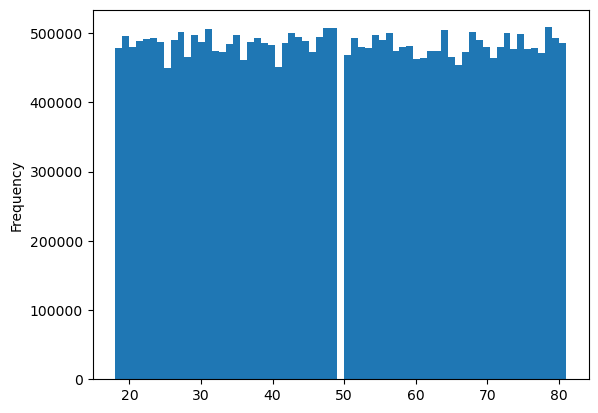

In [8]:
# Histogram showing frequency of ages
hist_ages = ords_prods_all_flagged['age'].plot.hist(bins = 65)

In [9]:
# Export histogram into project folder
hist_ages.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_ages.png'))

In [10]:
result = []

for value in ords_prods_all_flagged["age"]:
    if value <= 26:
        result.append("Gen Z")
    elif value <= 42:
        result.append("Mill")
    elif value <= 58:
        result.append("Gen X")
    else:
        result.append("Boom and older")

In [11]:
# Create new column called 'generation' within ords_prods_all dataframe and set it equal to result
ords_prods_all_flagged['gen_flag'] = result

In [12]:
# Frequency of generations
ords_prods_all_flagged['gen_flag'].value_counts()

Boom and older    11053462
Gen X              7823298
Mill               7729254
Gen Z              4353673
Name: gen_flag, dtype: int64

### Creating a income profiles. 

In [13]:
result = []

for value in ords_prods_all_flagged["income"]:
    if value <= 52200:
        result.append("Low Income")
    elif value <= 156600:
        result.append("Middle Income")
    else:
        result.append("Upper Income")

In [14]:
# Create new column called 'income_class' within ords_prods_all dataframe and set it equal to result_1
ords_prods_all_flagged['income_flag'] = result

In [15]:
# Frequency of income groups
ords_prods_all_flagged['income_flag'].value_counts()

Middle Income    24539228
Low Income        3692453
Upper Income      2728006
Name: income_flag, dtype: int64

## 3. (5b) Create flag for non-food and non-beverage departments

Together with the customer profiles, I can use this flag to help determine how customers are using Instacart. Are they using Instacart for only traditional grocery items? Is there an opportunity to advertise for other items such as personal care, pet care, household items, and baby items?

In [16]:
result = []

for value in ords_prods_all_flagged["department_id"]:
    if value == 2:
        result.append("N")
    elif value == 8:
        result.append("N")
    elif value == 11:
        result.append("N")
    elif value == 17:
        result.append("N")
    elif value == 18:
        result.append("N")
    else:
        result.append("Y")

In [17]:
# Create new column called 'food_bev?' within ords_prods_all dataframe and set it equal to result_1
ords_prods_all_flagged['food_bev?'] = result

In [18]:
# Frequency of non-food and non-beverage orders ('food_bev?')
ords_prods_all_flagged['food_bev?'].value_counts()

Y    29297661
N     1662026
Name: food_bev?, dtype: int64

In [19]:
df_non_food = ords_prods_all_flagged[ords_prods_all_flagged['food_bev?']== 'N']

In [20]:
# Frequency of departments in non-food and non-bev df 
df_non_food['department_id'].value_counts()

17    699857
11    424306
18    410392
8      93060
2      34411
Name: department_id, dtype: int64

## 4. (Step 6) Create visualizations to show the distribution of profiles

### (a) Generation profiles

In [21]:
ords_prods_all_flagged.groupby('gen_flag')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
gen_flag,,,,,,,,
Boom and older,11053462.0,70.079438,6.631902,59.0,64.0,70.0,76.0,81.0
Gen X,7823298.0,50.470723,4.607860,43.0,47.0,50.0,54.0,58.0
Gen Z,4353673.0,21.982510,2.574204,18.0,20.0,22.0,24.0,26.0
Mill,7729254.0,34.458980,4.607446,27.0,30.0,34.0,38.0,42.0


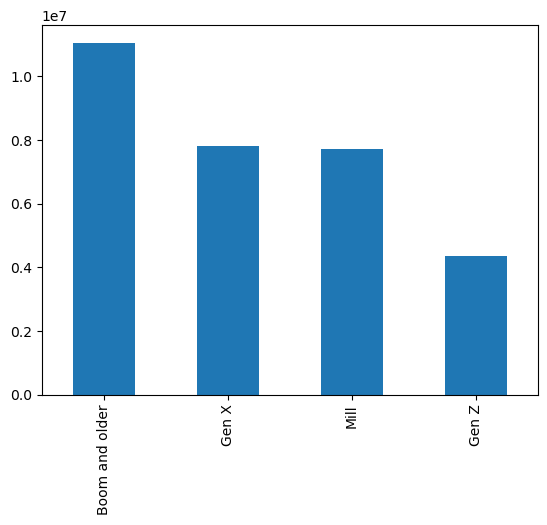

In [22]:
# Frequency of generations ('gen_flag')
bar_generations = ords_prods_all_flagged['gen_flag'].value_counts().plot.bar()

In [23]:
# Export bar chart into project folder
bar_generations.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_generations.png'))

### (b) Income profiles

In [24]:
ords_prods_all_flagged.groupby('income_flag')['income'].describe()

,count,mean,std,min,25%,50%,75%,max
income_flag,,,,,,,,
Low Income,3692453.0,40839.672374,6753.598420,25903.0,35200.0,41612.0,46391.0,52200.0
Middle Income,24539228.0,99834.316587,28827.126724,52201.0,74720.0,97987.0,121730.0,156600.0
Upper Income,2728006.0,177650.879211,52636.614366,156602.0,160438.0,164118.0,167870.0,593901.0


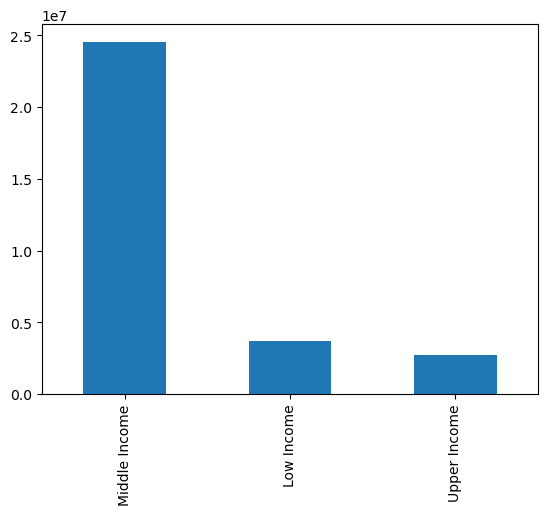

In [25]:
# Frequency of income groups ('income_class')
bar_income = ords_prods_all_flagged['income_flag'].value_counts().plot.bar()

In [26]:
# Export bar chart into project folder
bar_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income.png'))

## 5. (Step 7) Aggregate max, min, and mean variables on a customer-profile level for usage frequency ('order_freq_flag') and expenditure ('spend_flag').

### Generation Profiles:

In [27]:
ords_prods_all_flagged.groupby('gen_flag').agg({'max_order': ['mean', 'min', 'max']})

max_order        
                     mean min max
gen_flag                         
Boom and older  34.360929   5  99
Gen X           34.403995   5  99
Gen Z           34.480140   5  99
Mill            34.511657   5  99

In [28]:
ords_prods_all_flagged.groupby('gen_flag').agg({'avg_price': ['mean', 'min', 'max']})

avg_price                     
                    mean       min        max
gen_flag                                     
Boom and older  7.796875  1.262695  19.406250
Gen X           7.789062  1.000000  20.109375
Gen Z           7.785156  2.000000  14.898438
Mill            7.789062  1.000000  18.234375

In [29]:
ords_prods_all_flagged.groupby('gen_flag').agg({'median_days_since_last_order': ['mean', 'min', 'max']})

median_days_since_last_order           
                                       mean  min   max
gen_flag                                              
Boom and older                     9.953125  0.0  30.0
Gen X                              9.976562  0.0  30.0
Gen Z                              9.945312  0.0  30.0
Mill                               9.945312  0.0  30.0

### Income Profiles:

In [30]:
ords_prods_all_flagged.groupby('income_flag').agg({'max_order': ['mean', 'min', 'max']})

max_order        
                    mean min max
income_flag                     
Low Income     32.526219   5  99
Middle Income  34.637120   5  99
Upper Income   35.100666   5  99

In [31]:
ords_prods_all_flagged.groupby('income_flag').agg({'avg_price': ['mean', 'min', 'max']})

avg_price                     
                   mean       min        max
income_flag                                 
Low Income     6.765625  1.000000  13.875000
Middle Income  7.929688  1.299805  19.406250
Upper Income   7.937500  4.371094  20.109375

In [32]:
ords_prods_all_flagged.groupby('income_flag').agg({'median_days_since_last_order': ['mean', 'min', 'max']})

median_days_since_last_order           
                                      mean  min   max
income_flag                                          
Low Income                       10.476562  0.0  30.0
Middle Income                     9.898438  0.0  30.0
Upper Income                      9.765625  0.0  30.0

## 6. Exporting file as "orders_products_all_flagged_2.pkl"

In [33]:
ords_prods_all_flagged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30959687 entries, 0 to 32399727
Data columns (total 38 columns):
 #   Column                        Dtype   
---  ------                        -----   
 0   order_id                      int32   
 1   user_id                       int32   
 2   order_number                  int8    
 3   order_day_of_week             int8    
 4   order_hour_of_day             int8    
 5   days_since_last_order         float16 
 6   product_id                    int32   
 7   add_to_cart_order             int32   
 8   reordered                     int8    
 9   _merge                        category
 10  product_name                  object  
 11  aisle_id                      int8    
 12  department_id                 int8    
 13  prices                        float16 
 14  _merge_2                      category
 15  price_range_loc               object  
 16  busiest_day                   object  
 17  busiest_days                  object  
 18  

In [34]:
# Export flagged data to pkl
ords_prods_all_flagged.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_all_flagged_2.pkl'))